In [1]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math

In [2]:
job_name = "3ca7/single_weight"
job_dir = Path(Path.home(), "Documents/xray/score_bench/out", job_name)

rmsds = dict()
scores = dict() 

n_scores = len(list(job_dir.glob("scores*")))

include_native = False
native_scores = dict() 
native_rmsds = dict() 

for i in range(n_scores):
    rmsds_file = Path(job_dir, "rmsds_{}.p".format(i))
    with (open(rmsds_file, "rb")) as file:
        rmsds_dict = pickle.load(file)
    
    rmsds[i] = list() 
    for file_id in rmsds_dict.keys(): 
        if file_id >= 0: 
            rmsds[i].append(rmsds_dict[file_id])
        
    scores_file = Path(job_dir, "scores_{}.p".format(i))
    with (open(scores_file, "rb")) as file:
        scores_dict = pickle.load(file)
    
    scores[i] = list()
    for file_id in rmsds_dict.keys(): 
        if file_id >= 0: 
            scores[i].append(scores_dict[file_id])

    if -1 in rmsds_dict.keys(): 
        include_native = True 

        native_scores[i] = list()
        native_scores[i].append(scores_dict[-1])
        native_rmsds[i] = list() 
        native_rmsds[i].append(rmsds_dict[-1])

In [3]:
native_rmsds

{0: [0.0], 1: [0.0], 2: [0.0], 3: [0.0], 4: [0.0], 5: [0.0]}

In [4]:
if len(scores)%2 == 1: 
    n_row = len(scores)//2+1
else: 
    n_row = len(scores)//2
n_row

3

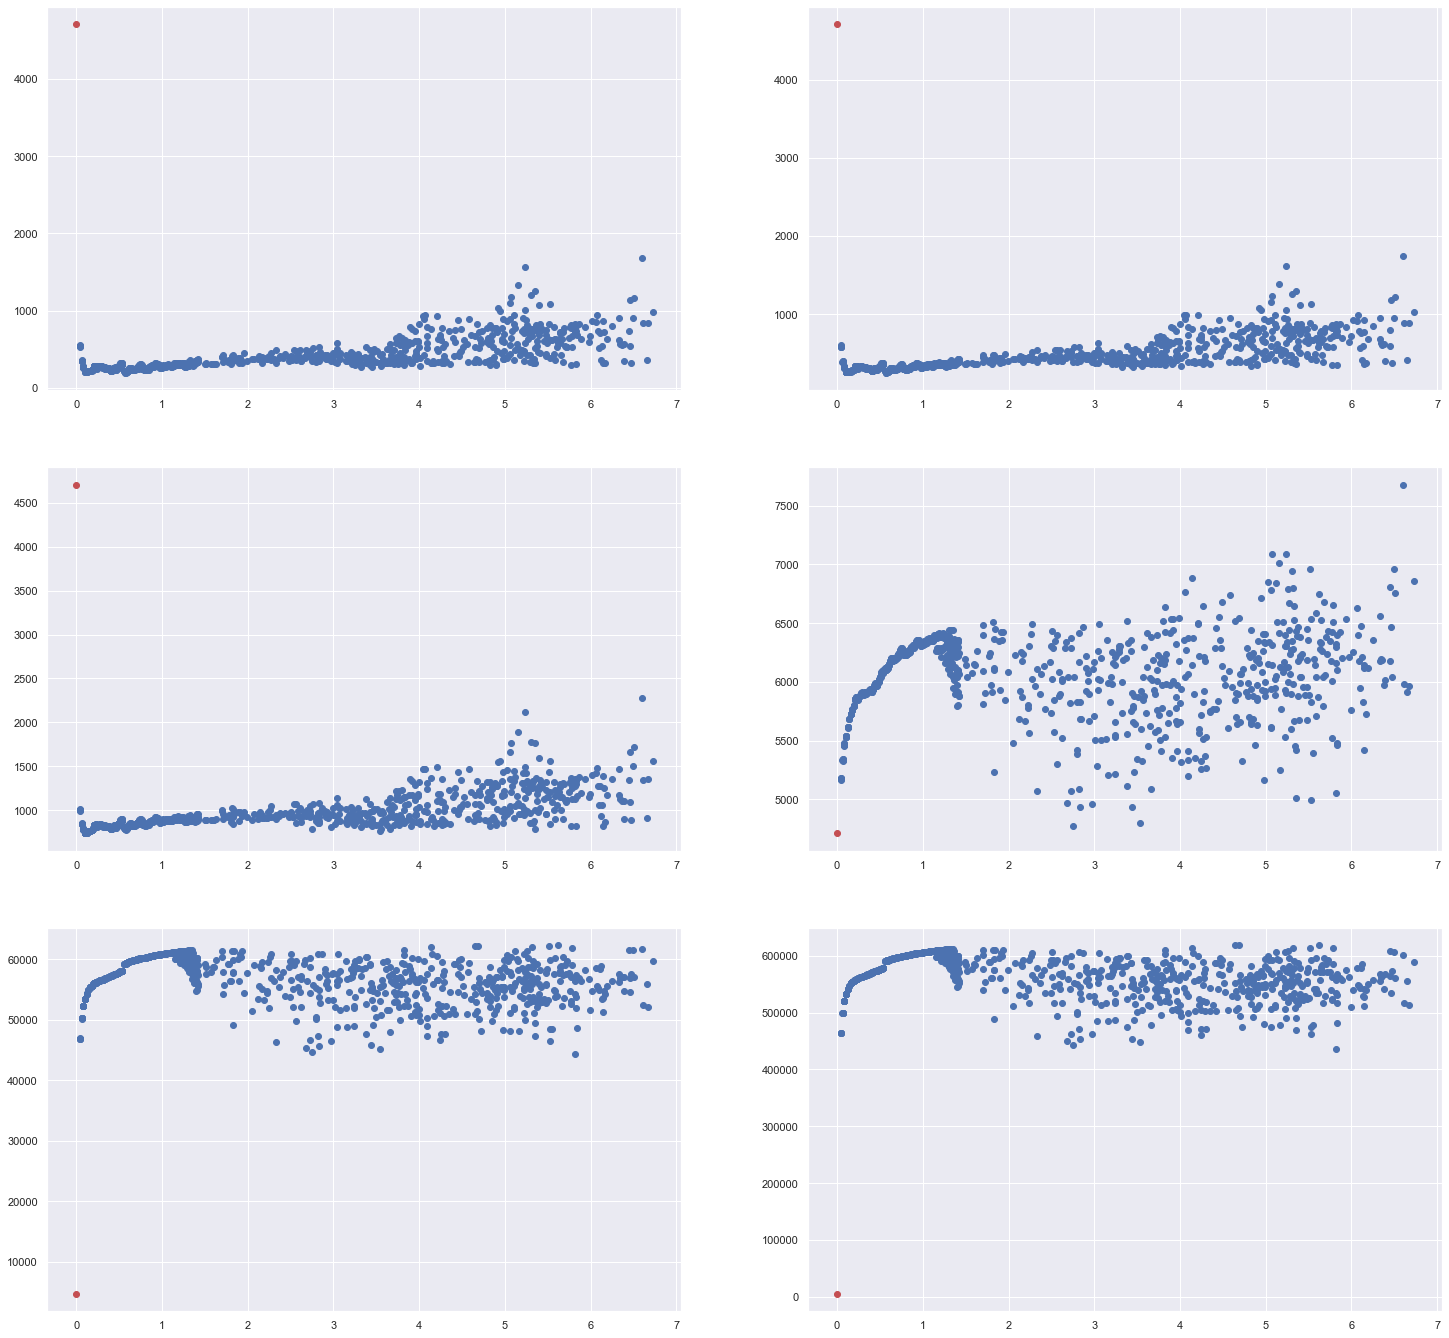

In [5]:
fig, axs = plt.subplots(n_row, 2, figsize=(25,8*n_row))
    
for i in range(len(scores)):
    if len(scores) > 2: 
        ax = axs[i//2][i%2]
    else: 
        ax = axs[i]


    ax.scatter(rmsds[i], scores[i])
    
    if include_native: 
        ax.scatter(native_rmsds[i], native_scores[i], c="r")

fig_file = Path(Path.home(), "Documents/xray/score_bench/out/3ca7/figures/single_weight")
plt.savefig(fig_file)
